In [116]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


IMG_SIZE=256
BATCH_SIZE = 32
TEST_SPLIT = 0.1
SEED=random.randrange(100)

IMAGES_PATH = "data"


def load_dataset():
    x_train, x_test = keras.utils.image_dataset_from_directory(
        f"{IMAGES_PATH}/images",
        labels=None,
        label_mode=None,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        seed=SEED,
        validation_split=TEST_SPLIT,
        subset="both",
    )
    y_train, y_test = keras.utils.text_dataset_from_directory(
        f"{IMAGES_PATH}/labels",
        labels=None,
        label_mode=None,
        batch_size=BATCH_SIZE,
        seed=SEED,
        validation_split=TEST_SPLIT,
        subset="both",
    )
    return x_train, x_test, y_train, y_test


Found 433 files belonging to 1 classes.
Using 390 files for training.
Using 43 files for validation.
Found 433 files belonging to 1 classes.
Using 390 files for training.
Using 43 files for validation.
Finished loading data
x_train element_spec: TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)
y_train element_spec: TensorSpec(shape=(None,), dtype=tf.float32, name=None)
x_test element_spec: TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)
y_test element_spec: TensorSpec(shape=(None,), dtype=tf.float32, name=None)


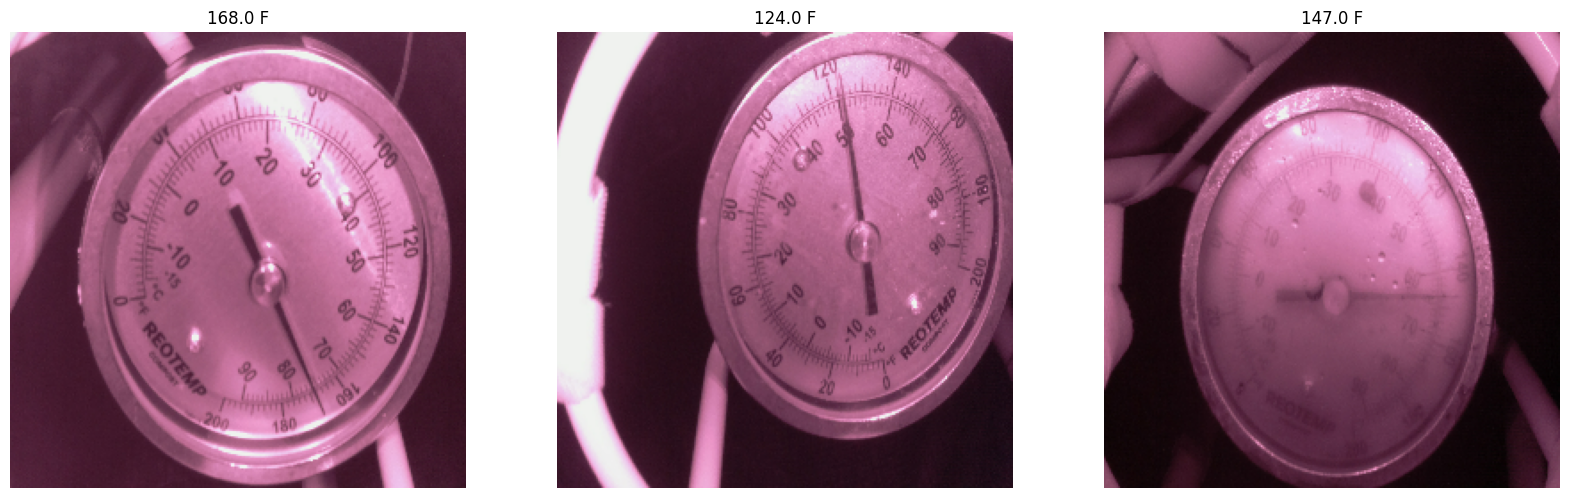

In [117]:
x_train, x_test, y_train, y_test = load_dataset()

print("Finished loading data")

y_train = y_train.map(lambda x: tf.strings.to_number(x))
y_test = y_test.map(lambda x: tf.strings.to_number(x))

def print_first_images(images, labels):
    """ Print out 3 images with labels """
    plt.figure(figsize=(20, 20))
    i = 0
    images_first_3 = list(images.take(3))
    labels_first_3 = list(labels.take(3))
    for images, labels in zip(images_first_3, labels_first_3):
        i += 1
        image = images[0, ...]
        label = labels[0, ...]
        plt.subplot(1, 3, i)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(f"{label.numpy()} F")
        plt.axis("off")

print_first_images(x_train, y_train)

print(f"x_train element_spec: {x_train.element_spec}")
print(f"y_train element_spec: {y_train.element_spec}")
print(f"x_test element_spec: {x_test.element_spec}")
print(f"y_test element_spec: {y_test.element_spec}")
# print(f"x_test: {list(x_test)}")
# print(f"y_test: {list(y_test)}")


train_ds = tf.data.Dataset.zip((x_train, y_train))
test_ds = tf.data.Dataset.zip((x_test, y_test))


In [121]:
EPOCHS = 30

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Conv2D(3, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mean_squared_error")

model_history = model.fit(train_ds, epochs=EPOCHS, shuffle=True, validation_data=test_ds)




Epoch 1/30
13/13 [==============================] - 6s 163ms/step - loss: 8864.9316 - val_loss: 4342.6245
Epoch 2/30
13/13 [==============================] - 4s 160ms/step - loss: 2444.1428 - val_loss: 2744.8354
Epoch 3/30
13/13 [==============================] - 5s 179ms/step - loss: 1107.4772 - val_loss: 1489.2369
Epoch 4/30
13/13 [==============================] - 5s 166ms/step - loss: 727.2287 - val_loss: 1150.4714
Epoch 5/30
13/13 [==============================] - 4s 166ms/step - loss: 385.1600 - val_loss: 1371.5175
Epoch 6/30
13/13 [==============================] - 5s 168ms/step - loss: 215.9051 - val_loss: 929.4553
Epoch 7/30
13/13 [==============================] - 5s 164ms/step - loss: 120.3732 - val_loss: 659.6718
Epoch 8/30
13/13 [==============================] - 5s 165ms/step - loss: 78.9303 - val_loss: 592.6918
Epoch 9/30
13/13 [==============================] - 5s 169ms/step - loss: 47.5978 - val_loss: 615.3037
Epoch 10/30
13/13 [==============================] - 5s 17

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (None, 254, 254, 3)       84        
                                                                 
 conv2d_167 (Conv2D)         (None, 252, 252, 3)       84        
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 126, 126, 3)      0         
 g2D)                                                            
                                                                 
 conv2d_168 (Conv2D)         (None, 124, 124, 3)       84        
                                                                 
 conv2d_169 (Conv2D)         (None, 122, 122, 3)       84        
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 61, 61, 3)        0         
 g2D)                                                

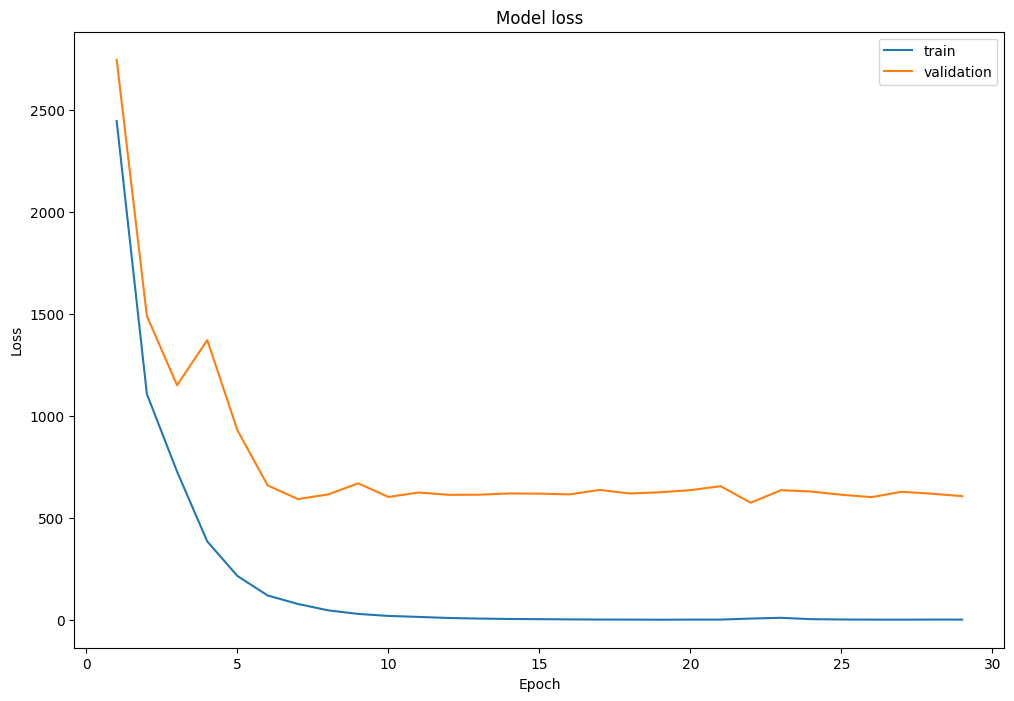

In [123]:
model.summary()

keras.utils.plot_model(model, "dl_temp_dial.png")
keras.utils.plot_model(model, "dl_temp_dial_with_shape_info.png", show_shapes=True)

def visualize_loss(history):
    df_loss_hist = pd.DataFrame(history.history)
    df_loss= df_loss_hist[['loss','val_loss']]
    df_loss.drop(index=df_loss.index[0], axis=0, inplace=True)
    df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
    df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')

visualize_loss(model_history)
